# SVMs - Soft Margin SVC

### Introduction

In practice, hard-margin SVC is rarely used because it cannot solve problems which involve data that is not perfectly linearly seperable. When attempting find a decision boundary for non-seperable data, algorithms to solve the dual problem do not converge to values of $\alpha_i$ (the multipliers). Decision boundaries created by hard-margin SVCs also may have poor generalisation outside of the training data. Outliers of a group have a large impact on the decision boundary solution. For these reasons, soft-margin SVC is preferred over hard-margin in essentially all practical applications. Misclassifications and data points within the feature space between the margins are permitted in soft-margin. These simple changes allow soft-margin SVC to provide decision boundaries for data that is not completely linearly seperable. The solutions are also more general and overfit less on the training data compared to those given by hard-margin counterpart.

### Theory

In soft-margin SVC, we introduce an associated **slack variable** $\xi_i$ with every data sample $X_i$ in the training dataset. The slack variable for a data point is non-zero when it can be consider a non-ideal case. By non-ideal we mean that,

- The data point is located within the feature space bounded by the margins. There are sub-cases of this,
    - A misclassification where the data point is on the wrong "side" of the decision boundary.  
    - Correct classification where the data point is on the right "side" of the decision boundary.

- The data point is outside of the margins and on the wrong "side" of the decision boundary (misclassified).

We say that these data points have slack. Most data points do not have slack and have $\xi_i= 0$. It should be noted that all data points which have slack $\xi_i \neq 0$ are support vectors, but not all support vectors have slack. Using the same treatment as in our hard-margin derivation, we want to maximise the margin width and formulate the following optimisation problem, 

$$
\begin{aligned}
& \min_{\mathbf{W}, b} \quad \frac{||\mathbf{W}||^2}{2} + C \sum^{N}_{i=1} \xi_i  \\
& \text{subject to:} \quad y_i (X_i W^T + b) \geq 1 - \xi_i \quad \text{and} \quad \xi_i \geq 0 \quad \forall \ i = 1, \dots, N
\end{aligned}
$$

Notice that an additional term has been added to account for the slack. In this new term, $C$ a new hyperparameter which controls the extent to which our model wants to minimise the total slack across all samples. The condition $y_i (X_i W^T + b) \geq 1 - \xi_i$ allows data samples to be misclassified and/or between the margins if they have non-zero slack such that $\xi_i > 0$. We can construct the Lagrangian $\mathcal{L}$ as follows,

$$
\mathcal{L}(W_i, \xi_i, b) = \frac{||\mathbf{W}||^2}{2} + C \sum^{N}_{i=1} \xi_i - \sum^{N}_{i=1} \alpha_i \left[ y_i (X_i W^T + b) + \xi_i - 1 \right] - \sum^{N}_{i=1} \beta_i \xi_i
$$

We have an additional constraints from the slack variables. Namely, that $\xi_i \geq 0 \quad \forall \ i = 1, \dots, N$ and for each of these constraints we have the associated multipier $\beta_i$. When we minimise our Lagrangian $\mathcal{L}$ over the primal variables we get, 

$$
W_k = \sum_{i=1}^{N} \alpha_i y_i X_{ik}, \quad \sum_{i=1}^{N} \alpha_i y_i = 0 \quad \text{and} \quad C = \alpha_i + \beta_i
$$

This is the same as for the hard-margin case with the exception of $C = \alpha_i + \beta_i$ which arise due to the addition of slack variables. Since we have $\alpha_i \geq 0$ and $\beta_i \geq 0$ for all $i$, we have an upper bound on the values of our mulipliers such that $0 \leq \alpha_i \leq C$ and $0 \leq \beta_i \leq C$. When we substitue $C = \alpha_i + \beta_i$ into the Lagrangian $\mathcal{L}(W_i, \xi_i, b)$ it reduces into that of its hard-margin counterpart, 

$$
\mathcal{L}(W_i, b) = \frac{||\mathbf{W}||^2}{2} - \sum^{N}_{i=1} \alpha_i \left[ y_i (X_i W^T + b) - 1 \right]
$$

We know that the dual function $g(\alpha_i)$ is then, 

$$
g(\alpha_i) = \sum_{i=1}^{N} \alpha_i - \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i \alpha_j y_i y_l X_i X_j^T
$$

The optimisation problem is then,

$$
\begin{aligned}
& \max_{\alpha_i} \quad \sum_{i=1}^{N} \alpha_i - \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_i \alpha_j y_i y_j X_i X_j^T \\
& \text{subject to:} \quad \sum_{i=1}^{N} \alpha_i y_i = 0, \quad 0 \leq \alpha_i \leq C, \quad \forall \ i = 1, \dots, N\\
& \text{such that:} \quad W_k = \sum_{i=1}^{N} \alpha_i y_i X_{ik} \quad, \quad \alpha_i \left[ y_i (X_iW^T + b) + \xi_i -1 \right] = 0 \quad \text{and} \quad \beta_i \epsilon_i = 0
\end{aligned}
$$

There are a few changes from the hard-margin case. The most important is that our multipliers $\alpha_i$ have an upper bound. All else remains the same with the exception of the complementary slackness condition that now includes the slack variables $\xi_i$ and its multipliers $\beta_i$ . We will show how these slackness condition allows us to determine whether a point is on the margin, within the margins or outside them by its respective $\alpha$ value in a latter section.

### Computation of Model Parameters

When minimising the Lagrangian $\mathcal{L}(W_i, \xi_i, b)$, we derived an expression that let all calculate the weight for each feature $f$, 

$$
W_f = \sum_{i=1}^{N} \alpha_i y_i X_{if}
$$

By considering a support vector with the index $m$ that lies exactly on the margin such that $\alpha_m > 0$, $\xi_m = 0$ and $y_m = \pm 1$, we can find an equation for $b$ from the following slackness condition,

$$
\alpha_i \left[ y_m (X_mW^T + b) + \xi_m -1 \right] = 0 \Longrightarrow b = y_m - X_s W^T
$$

$W$ is the weights row vector those compontents are $W_k$. Using our equation for $W_k$ in terms of our multipliers $\alpha_i$, we find that,

$$
b = y_m - \sum_{i=1}^{N} \alpha_i y_i X_m X_i^T
$$

However, in practise we average over all $N_m$ number of margin support vectors to find the bias $b$, 

$$
b = \frac{1}{N_m} \sum_{m=1}^{N_m} \left( y_m - \sum_{i=1}^{N} \alpha_i y_i X_m X_i^T \right)
$$

To compute the slack variables, $\xi_i$ we use the slackness conditions and find that, 

$$
\epsilon_i =
\begin{cases}
1 - y_i \left( X_i W^T + b \right), & \alpha_i = C \\
0, & \text{otherwise}
\end{cases}
$$

Finally, the slackness multipliers $\beta_i$ given from the condition $C = \alpha_i + \beta_i$ for all $i$ which was found when we mimimised $\mathcal{L}(W_i, \xi_i, b)$,

$$
\beta_i = C - \alpha_i
$$

For completeness, we can write our classifier $\hat{y}_i = \text{sign}[f(X_i)]$ as the following,

$$
f(X_i) = b + \sum^{N}_{j=1} \alpha_j y_j X_i X_j^T 
$$

### Complementary Slackness Conditions

The slackness conditions $\alpha_i \left[ y_i (X_iW^T + b) + \xi_i -1 \right] = 0$ and $\beta_i \epsilon_i = 0$ allow us to determine the nature of a data point from its $\alpha_i$ value. We have three distinct cases where $\alpha_i = 0$, $0 \leq \alpha_i \leq C$ and $\alpha_i = C$. Let us go through each of these cases,

- (a). When $\alpha_i = 0$, we have $\beta_i = C$ from $\alpha_i + \beta_i = C$. Since $\beta_i$ is positive and finite, it means that the data point has no slack such that $\xi_i = 0$ because it must be true that $\beta_i \xi_i = 0$. As a consequence we have,

$$
\alpha_i \left[ y_i (X_iW^T + b) + \xi_i -1 \right] = 0
$$

$$
\alpha_i \left[ y_i (X_iW^T + b) -1 \right] = 0
$$

$$
 y_i (X_iW^T + b) -1 \geq 0
$$

$$
y_i (X_iW^T + b) \geq 1
$$

This means that the data point is either on the margins or outside of them. However, under strict complementarity (non-degeneracy) we have, 

$$
\Longrightarrow y_i (X_iW^T + b) > 1
$$

Therefore, when $\alpha_i = 0$, the data point must lie outside the margins and not be a support vector.

- (b).

- (c).

### Implementation

In [20]:
# Dependencies,
import numpy as np
from cvxopt import matrix, solvers

class BaseSVC:
    """Class for the support vector classifier (SVC)."""

    def __init__(self, C=1, kernel="linear", kernel_params=None):
        """Constructor method."""

        # Model parameters,
        self.weights, self.bias = None, None
        self.label = "support vector classifier (soft-margin)"
        self.kernel, self.kernel_params = kernel, kernel_params
        self.fitted, self.scored = False, False
        self.C = C

        # Training data,
        self.X, self.y = None, None
        self.n_samples, self.n_features = None, None
        self.model_score = None

        # Related to the optimisation algorithm,
        self.Q_matrix = None
        self.alphas = None
        self.sv_idxs = None
        self.n_sv = None

    def fit(self, X, y):
        """Use this method to fit the model."""

        # Assigning data properties,
        self.X, self.y = X, np.where(y <= 0, -1, 1) # <-- Re-labeling class labels.
        self.n_samples, self.n_features = X.shape[0], X.shape[1]

        # Computing our Lagrangian multipliers,
        self.alphas = self._solve_dual_()

        # Computing model parameters,
        self.weights = np.dot(self.alphas*self.y, self.X)
        self.bias = np.mean([self.y[i] - np.dot(self.weights, self.X[i]) for i in self.sv_idxs])

        # Update fitted state,
        self.fitted = True

    def predict(self, X):
        """This method returns the predictions when supplied with samples."""
        return np.sign(self._decision_function(X)).astype(int)

    def score(self, X, y):
        """Computes the classification accuracy on the provided data."""

        # Re-labeling class labels,
        y = np.where(y <= 0, -1, 1)
        
        # Computing predictions,
        y_pred = self.predict(X)

        # Calculating classification accuracy,
        accuracy = np.mean(y_pred == y)
        self.model_score = accuracy
        self.scored = True

        return accuracy

    def _solve_dual_(self, verbose=False, epsilon=1e-5):
        """Finds the Lagrange multipliers which maximise the dual function for the hard-margin SVC."""

        # Constructing the Q matrix (weighted Gram matrix),
        self.Q_matrix = np.outer(self.y, self.y)*np.dot(self.X, self.X.T)
        ones_vector = np.ones(self.n_samples, dtype=np.double)

        """Translating into CVXOPT formalism."""

        # Objective function,
        self.Q_matrix = np.outer(self.y, self.y) * np.dot(self.X, self.X.T)
        P_matrix_obj = matrix(self.Q_matrix.astype(np.double)) # <-- Wrapping the matrix  
        q_vector_obj = matrix(-1*ones_vector)

        # Constraint (1),
        G_std = -np.eye(self.n_samples)
        h_std = np.zeros(self.n_samples)

        G_slack = np.eye(self.n_samples)
        h_slack = np.ones(self.n_samples) * self.C

        G_object = matrix(np.vstack((G_std, G_slack)))
        h_object = matrix(np.hstack((h_std, h_slack)))

        # Constraint (2),
        A_object = matrix(self.y.reshape(1, -1).astype(np.double))
        b_object = matrix([0.0])

        # Solving,
        if not verbose:
            solvers.options['show_progress'] = False
        sol = solvers.qp(P=P_matrix_obj , q=q_vector_obj, G=G_object, h=h_object, A=A_object, b=b_object)
        alphas = np.asarray(sol["x"]).flatten() # <-- Extracting Lagrange multipliers.

        # Extracting support vectors,
        self.sv_idxs = np.where(alphas > epsilon)[0]
        self.n_sv = len(self.sv_idxs)

        return alphas

    def _decision_function(self, X):
        """Returns the distance a sample is from the decision boundary in feature space."""
        return np.dot(X, self.weights) + self.bias
    
    def _compute_slack(self, epsilon_bound=1e-3):
        """Computes the slack variable for each training sample and its assoiated Lagrange multiplier. Returns a tuple."""

        # Computing the lagrange multipliers,
        slack_multipliers = self.C - self.alphas

        # Computing slack variables,
        slack_vars = np.zeros(shape=self.n_samples)
        mask = (self.alphas > self.C - epsilon_bound) & (self.alphas < self.C + epsilon_bound) # <-- We create a mask.
        selected_idxs = mask.nonzero()[0] # <-- Extracting indices where condition was met.
        for idx in selected_idxs:
            slack_vars[idx] = 1 - self.y[idx]*(np.dot(self.X[idx], self.weights) + self.bias)
        
        return slack_vars, slack_multipliers
    
    def _repr_html_(self):
        """Compact HTML GUI as the object representation in Jupyter Notebook."""
        html = f"""
        <div style="
            border:1px solid black;
            border-radius:6px;
            font-family:Arial, sans-serif;
            font-size:12px;
            line-height:1.2;
            width:fit-content;
            background:white;
            color:black;
            padding-left:8px;
            padding-right:8px;
        ">
            <!-- Title bar -->
            <i>{self.label}</i>
            <div style="
                background:#e0e0e0;
                padding:3px 6px;
                font-weight:bold;
                border-bottom:1px solid black;
                border-top-left-radius:6px;
                border-top-right-radius:6px;
                color:black;
            ">
                SVC
                <div style="margin-top:2px;">
                    <img src="svc_icon.png" alt="tree icon" width="30" height="30">
                </div>
            </div>

            <!-- Hyperparameters -->
            <ul style="margin:4px 0 4px 16px; padding:0;">
                <b>Hyperparameters:</b><br>
                self.C:</b> {self.C}<br>
                self.kernel:</b> {self.kernel}<br>
                self.kernel_params:</b> {self.kernel_params}<br>
            </ul>

            <!-- Divider -->
            <div style="
                border-top:1px solid #ccc;
                margin:4px 0;
            "></div>

            <!-- Status and other info -->
            <ul style="margin:4px 0 4px 16px; padding:0;">
        """

        if self.fitted:
            html += "<b>Status:</b> <span style='color:green;'>Fitted</span><br>"
            html += f"Score:</b>{round(self.model_score, 3) if self.scored == True else None}<br>"
            html += f"self.n_features:</b> {self.n_features}<br>"
            html += f"self.n_samples:</b> {self.n_samples}<br>"
            html += f"self.n_sv:</b> {self.n_sv}<br>"
        else:
            html += "<b>Status:</b> <span style='color:red;'>Not Fitted</span><br>"

        return html

### Synthetic Dataset Example

Let us test our SVC on the following synthetic toy dataset,

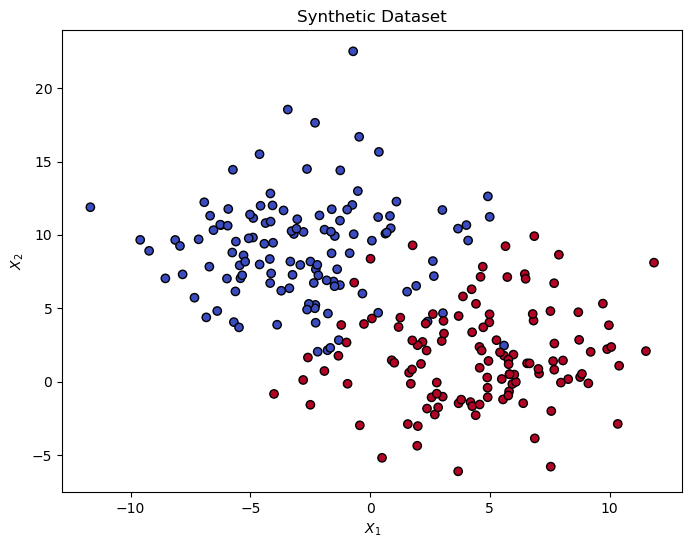

In [21]:
# Importing,
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Gaussian blobs as class groups,
X, y = make_blobs(n_samples=300, centers=2, n_features=2,
                  cluster_std=3.5, random_state=42)

# Data splot,
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True
)

# Plotting,
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors="k")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.title("Synthetic Dataset")
plt.show()

Now we employ our implementation of SVC,

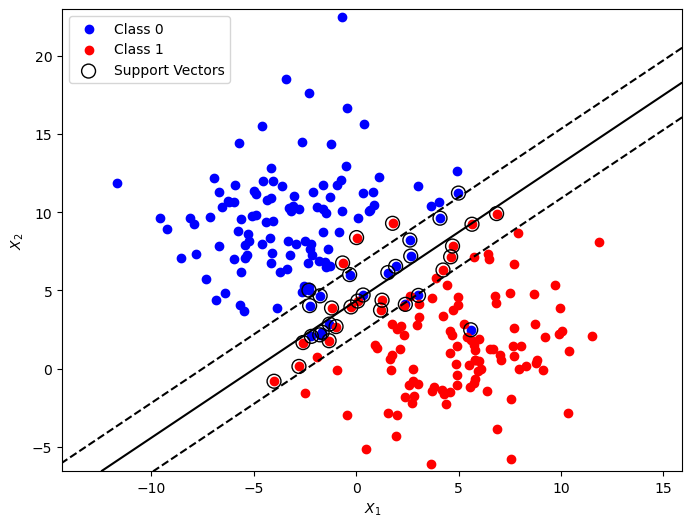

In [24]:
# Fitting the model,
clf = BaseSVC(C=1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

# Plotting,
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], 
            color="blue", label="Class 0")
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], 
            color="red", label="Class 1")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")

# Support vectors,
plt.scatter(clf.X[clf.sv_idxs, 0], clf.X[clf.sv_idxs, 1], 
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

# Creating grid to evaluate model,
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx = np.linspace(x_min, x_max, 500)
yy = np.linspace(y_min, y_max, 500)
XX, YY = np.meshgrid(xx, yy)

# Computing decision function for each point in the grid,
Z = (clf.weights[0] * XX + clf.weights[1] * YY + clf.bias)

plt.contour(XX, YY, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
plt.legend(loc="upper left")
plt.show()


We see that in our case, our SVC achieves a 90% classification accuracy on the training data with $C=1$.

In [25]:
clf

In [13]:
clf = BaseSVC()
clf

Our implementation produces the same solution as sci-kit learn's,

weights: [ 0.39407315 -0.44899541], bias: 2.1603606515590736
Score: 0.8666666666666667


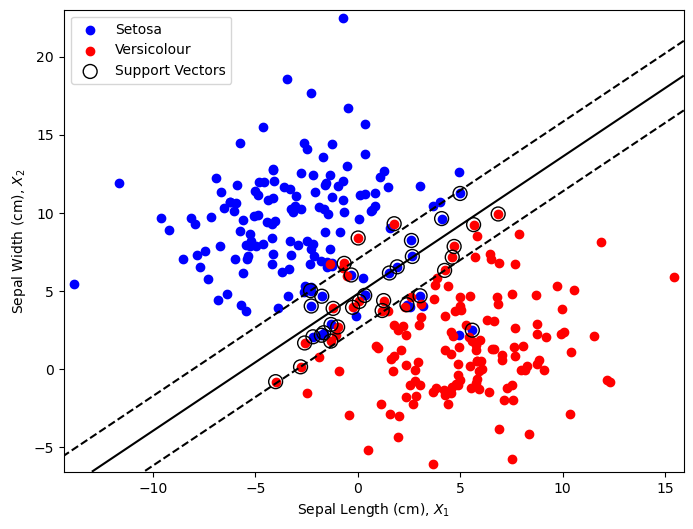

In [48]:
# Importing,
from sklearn.svm import SVC as SKSVC

# Fitting model,
sk_clf = SKSVC(kernel="linear", C=1) # <-- Approximating a hard-margin.
sk_clf.fit(X_train, y_train)

# Extracting model parameters,
w, b = sk_clf.coef_[0], sk_clf.intercept_[0]
print(f"weights: {w}, bias: {b}")
print("Score:", sk_clf.score(X_test, y_test)) #<-- Scoring model.

# Plotting,
plt.figure(figsize=(8, 6))
plt.scatter(X[y==0, 0], X[y==0, 1], color="blue", label="Setosa")
plt.scatter(X[y==1, 0], X[y==1, 1], color="red", label="Versicolour")
plt.xlabel("Sepal Length (cm), $X_1$")
plt.ylabel("Sepal Width (cm), $X_2$")

# Support vectors,
plt.scatter(
    sk_clf.support_vectors_[:, 0],
    sk_clf.support_vectors_[:, 1],
    s=100, facecolors='none', edgecolors='k',
    label="Support Vectors"
)

# Creating grid,
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Creating the decision function,
Z = sk_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting decision boundary and margins,
plt.contour(xx, yy, Z, levels=[-1, 0, 1],
            linestyles=['--', '-', '--'], colors='k')
plt.legend(loc="upper left")
plt.show()

### References

https://www.youtube.com/watch?v=MZzp4OP8GgQ

https://www.youtube.com/watch?v=jthjk2nboDM

https://kuleshov-group.github.io/aml-book/contents/lecture13-svm-dual.html

kernel types: https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html